### importing the required libraries

In [1]:
import os
import h5py    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Activation
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_score, recall_score, f1_score, precision_recall_curve, auc

import cv2
from PIL import Image

### reading the h5 file

In [2]:
filepath="E:\\Autonomous_Vehicles_SVHN_single_grey1.h5"
df= h5py.File(filepath,'r') #read hd5 file
dataframe=np.array(df)
ls=list(dataframe)
print("List of datasets in this file: \n",ls)

List of datasets in this file: 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


### Split the data into X_train, X_test, Y_train, Y_test

In [3]:
X_test = np.array(df['X_test'])
X_train = np.array(df['X_train'])
X_val = np.array(df['X_val'])

y_test = np.array(df['y_test'])
y_train = np.array(df['y_train'])
y_val = np.array(df['y_val'])

print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of X_val:",X_val.shape)
print("Shape of y_val:",y_val.shape) 

Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)
Shape of X_val: (60000, 32, 32)
Shape of y_val: (60000,)


### Data Visualisation and preprocessing

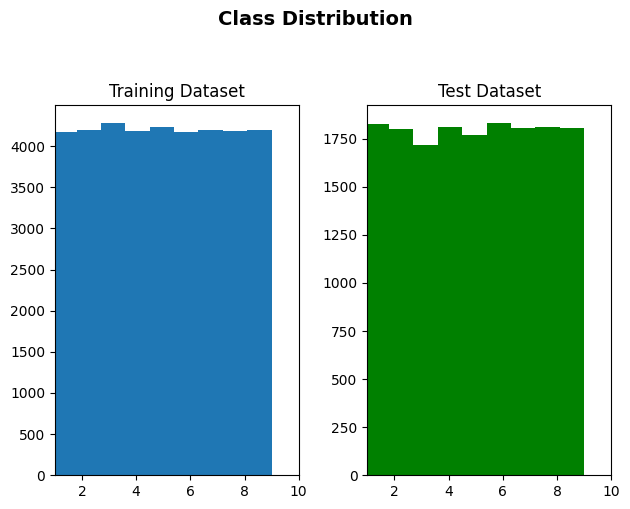

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training Dataset")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test Dataset")

fig.tight_layout()

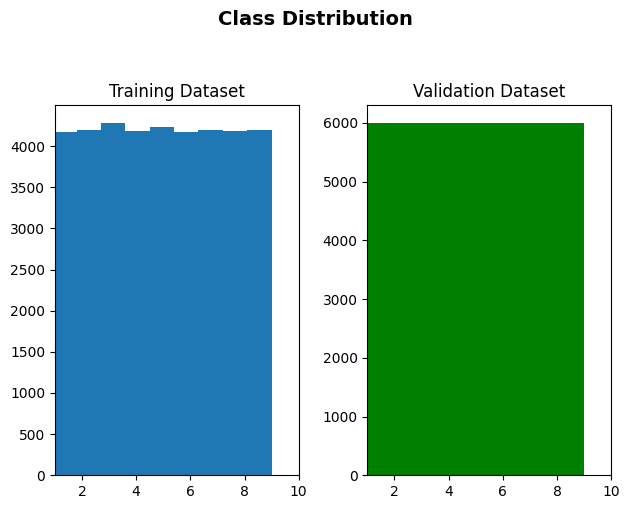

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training Dataset")
ax1.set_xlim(1, 10)

ax2.hist(y_val, color='g', bins=10)
ax2.set_title("Validation Dataset")

fig.tight_layout()

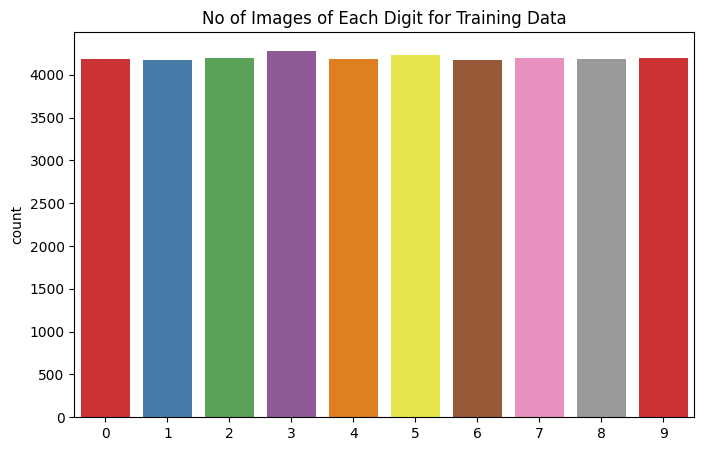

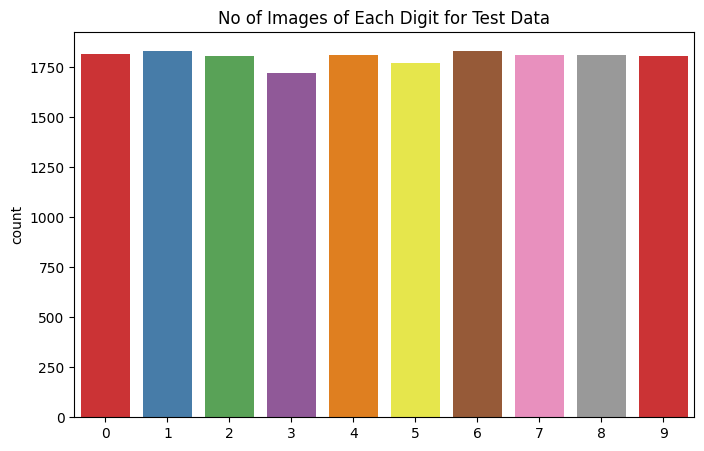

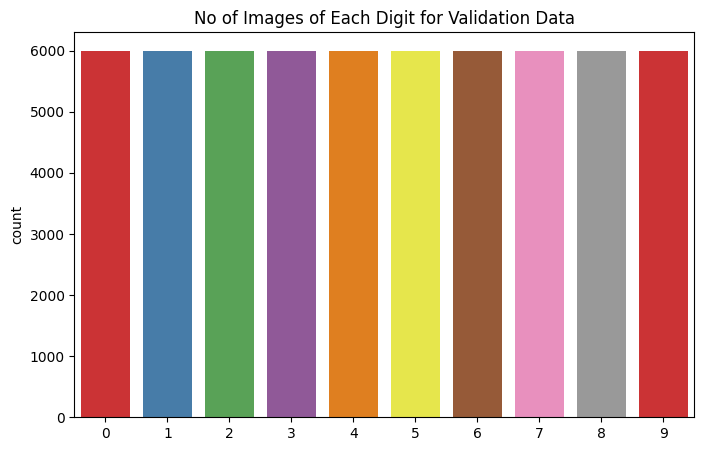

In [6]:
ax1 = plt.subplots(figsize=(8,5))
ax1 = sns.countplot(x=y_train, palette = "Set1")

ax1.set_title("No of Images of Each Digit for Training Data")

ax2 = plt.subplots(figsize=(8,5))
ax2 = sns.countplot(x=y_test, palette = "Set1")

ax2.set_title("No of Images of Each Digit for Test Data")

ax3 = plt.subplots(figsize=(8,5))
ax3 = sns.countplot(x=y_val, palette = "Set1")

ax3.set_title("No of Images of Each Digit for Validation Data")
plt.show()

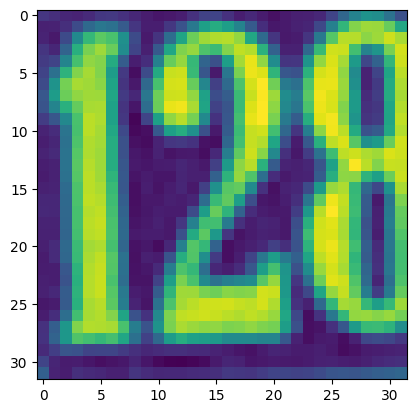

In [7]:
plt.imshow(X_train[0])

### Visualizing the first 10 images in train data and print their corresponding labels

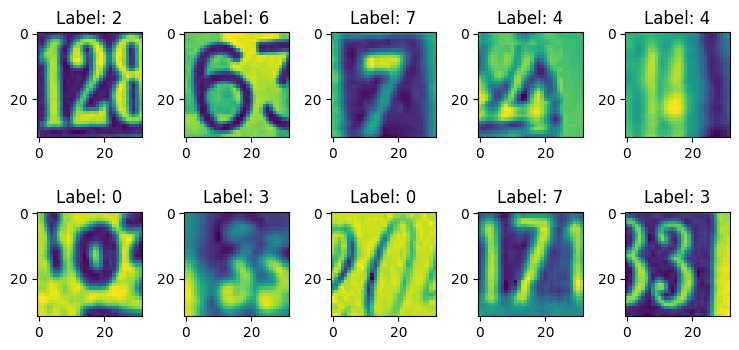

In [8]:
num_row = 2
num_col = 5
fig,axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row)) 
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i])
    ax.set_title('Label: {}'.format(y_train[i]))
    plt.tight_layout() 
    
plt.show()

### Reshape all the images with appropriate shapes and update the data in the same variable.
### and Normalising the images i.e. Normalising the pixel values.

In [9]:
import numpy as np
x_train = np.expand_dims(X_train, axis=-1) 
x_train = x_train.astype('float32') / 255
x_val = np.expand_dims(X_val, axis=-1) 
x_val = x_val.astype('float32') /255
x_test = np.expand_dims(X_test, axis=-1)
x_test = x_test.astype('float32') /255
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)

Shape of x_train: (42000, 32, 32, 1)
Shape of x_val: (60000, 32, 32, 1)
Shape of x_test: (18000, 32, 32, 1)


### Transforming Labels into a format acceptable by Neural Network

In [10]:
y_train=keras.utils.to_categorical(y_train)
y_val=keras.utils.to_categorical(y_val)
y_test=keras.utils.to_categorical(y_test)

print("Shape of ytrain:",y_train.shape)
print("Shape of yval:",y_val.shape)
print("Shape of ytest:",y_test.shape)

Shape of ytrain: (42000, 10)
Shape of yval: (60000, 10)
Shape of ytest: (18000, 10)


In [11]:
print(np.unique(X_train))

[0.000000e+00 1.140000e-01 2.280000e-01 ... 2.547465e+02 2.548605e+02
 2.549745e+02]


In [12]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [13]:
X_train.shape

(42000, 32, 32)

In [14]:
x_train.shape

(42000, 32, 32, 1)

### Printing the total Number of classes in the Dataset

In [15]:
num_classes = y_train.shape[1]
print("Number of classes:", num_classes)

Number of classes: 10


### Model Training & Evaluation using Neural Network(CNN)

In [16]:
CNN = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3),activation='relu', input_shape=(32, 32, 1)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32, (3, 3),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    
    keras.layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),    
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(10 ,  activation='softmax')
])
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        2

In [17]:
CNN.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [18]:
history = CNN.fit(x=x_train, y=y_train,validation_data=(x_val, y_val),batch_size=32,epochs=20,verbose=1)

Epoch 1/20
1313/1313 [==============================] - 118s 88ms/step - loss: 1.0722 - accuracy: 0.6394 - val_loss: 0.4400 - val_accuracy: 0.8672
Epoch 2/20
1313/1313 [==============================] - 120s 92ms/step - loss: 0.4624 - accuracy: 0.8664 - val_loss: 0.4479 - val_accuracy: 0.8778
Epoch 3/20
1313/1313 [==============================] - 124s 94ms/step - loss: 0.3619 - accuracy: 0.8965 - val_loss: 0.2631 - val_accuracy: 0.9269
Epoch 4/20
1313/1313 [==============================] - 127s 97ms/step - loss: 0.3145 - accuracy: 0.9105 - val_loss: 0.3249 - val_accuracy: 0.9064
Epoch 5/20
1313/1313 [==============================] - 127s 97ms/step - loss: 0.2874 - accuracy: 0.9196 - val_loss: 0.4370 - val_accuracy: 0.8726
Epoch 6/20
1313/1313 [==============================] - 126s 96ms/step - loss: 0.2563 - accuracy: 0.9300 - val_loss: 0.2669 - val_accuracy: 0.9247
Epoch 7/20
1313/1313 [==============================] - 126s 96ms/step - loss: 0.2422 - accuracy: 0.9328 - val_loss: 0

### Ploting the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot 

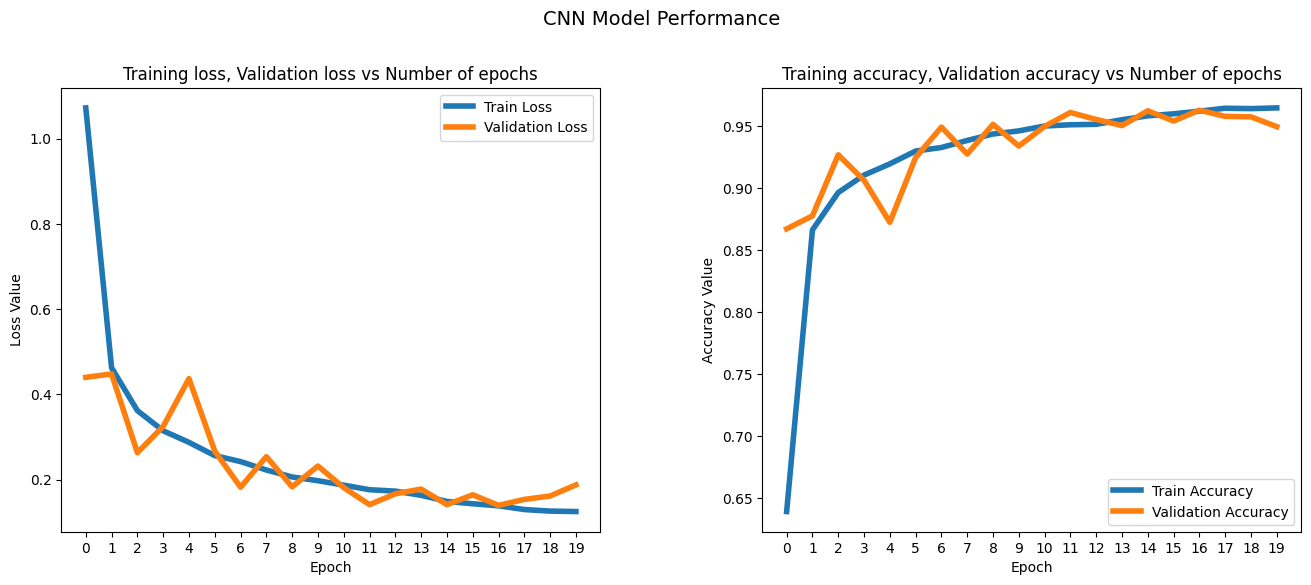

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
title = fig.suptitle('CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['loss'], label='Train Loss',linewidth=4)
ax1.plot(epoch_list, history.history['val_loss'], label='Validation Loss',linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Loss Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Training loss, Validation loss vs Number of epochs')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['accuracy'], label='Train Accuracy', linewidth=4)
ax2.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Accuracy Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Training accuracy, Validation accuracy vs Number of epochs')
l2 = ax2.legend(loc="best")

In [20]:
CNN_Train_score = CNN.evaluate(x_train, y_train)
print("TRAIN SET: %s: %.2f%%" % (CNN.metrics_names[1], CNN_Train_score[1]*100))

1313/1313 [==============================] - 24s 18ms/step - loss: 0.1439 - accuracy: 0.9597
TRAIN SET: accuracy: 95.97%


In [21]:
CNN_scores = CNN.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (CNN.metrics_names[1], CNN_scores[1]*100))

563/563 [==============================] - 10s 18ms/step - loss: 0.2895 - accuracy: 0.9260
TEST SET: accuracy: 92.60%


In [22]:
test_predictions2 = CNN.predict(x_test)

563/563 [==============================] - 10s 18ms/step


In [28]:
def plot_images(img,labels,nrows,ncols,pred_labels=None):
    fig = plt.figure(figsize = (25,10));
    axes = fig.subplots(nrows,ncols)
    for i, ax in enumerate(axes.flat):
        ax.imshow(img[i])
        ax.set_xticks([]); ax.set_yticks([])
        if pred_labels is None:
            ax.set_title('True: %d' % labels[i])
        else:
            ax.set_title('True: {0}, Pred: {1}'.format(labels[i], np.argmax(pred_labels[i])))


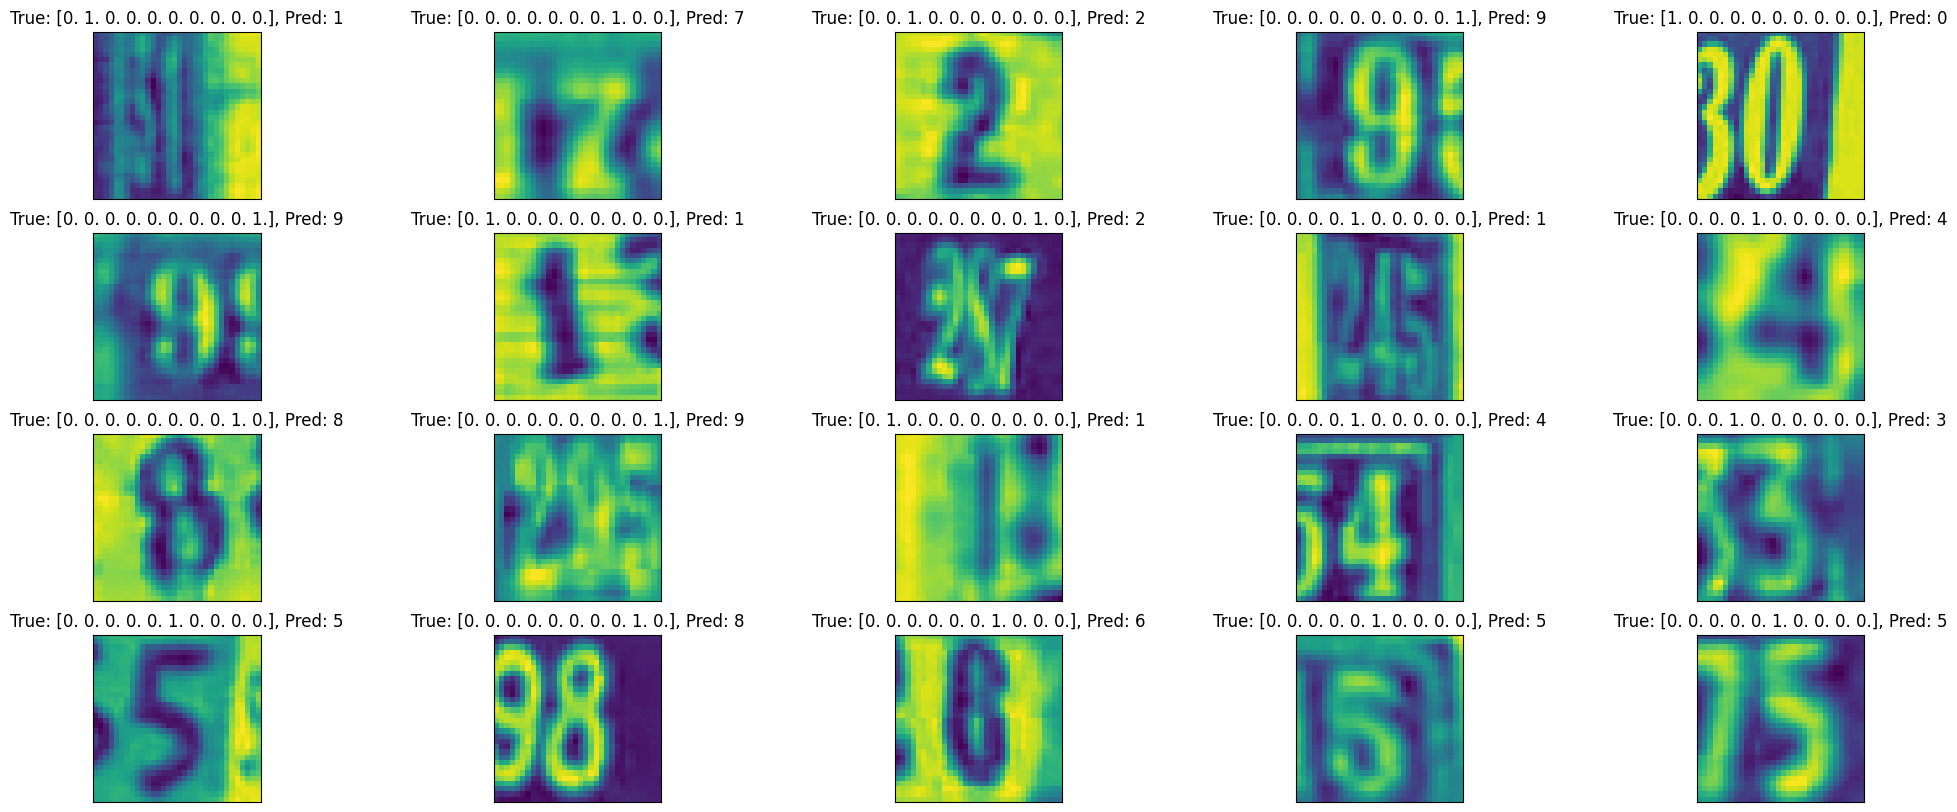

In [29]:
plot_images(x_test, y_test, 4, 5, test_predictions2)

In [30]:
CNN.save('SVHN_Model_CNN.h5')

In [32]:
from tensorflow.keras.models import load_model
SVHN_Model = load_model("E:\\Tejas\\CA3\\SVHN_Model_CNN.h5")


In [33]:
SVHN_Model_Train_score=SVHN_Model.evaluate(x_train, y_train)
print("TRAIN SET ACCURACY: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_score[1]*100))

SVHN_Model_Train_score=SVHN_Model.evaluate(x_test, y_test)
print("TEST SET ACCURACY: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_score[1]*100))

SVHN_Model_Train_val_score=SVHN_Model.evaluate(x_val, y_val)
print("TEST SET (VAL) ACCURACY: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_val_score[1]*100))

1313/1313 [==============================] - 23s 17ms/step - loss: 0.1439 - accuracy: 0.9597
TRAIN SET ACCURACY: accuracy: 95.97%
563/563 [==============================] - 11s 20ms/step - loss: 0.2895 - accuracy: 0.9260
TEST SET ACCURACY: accuracy: 92.60%
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1876 - accuracy: 0.9496
TEST SET (VAL) ACCURACY: accuracy: 94.96%


In [34]:
SVHN_Model_predictions = SVHN_Model.predict(x_test)
preds = np.argmax(SVHN_Model_predictions, axis=1)

np.argmax(SVHN_Model_predictions)

563/563 [==============================] - 10s 18ms/step


39

In [38]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(SVHN_Model.predict(x_test),axis=1)

563/563 [==============================] - 10s 17ms/step


In [39]:
print(classification_report(y_test_arg, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1814
           1       0.93      0.90      0.92      1828
           2       0.88      0.96      0.92      1803
           3       0.93      0.90      0.92      1719
           4       0.95      0.92      0.94      1812
           5       0.92      0.94      0.93      1768
           6       0.88      0.94      0.91      1832
           7       0.93      0.93      0.93      1808
           8       0.92      0.91      0.92      1812
           9       0.97      0.90      0.93      1804

    accuracy                           0.93     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.93      0.93      0.93     18000



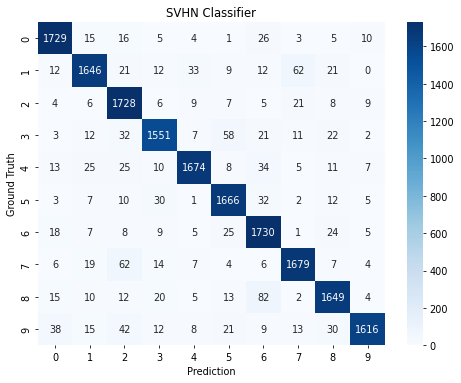

In [41]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# To evaluate the accuracy of the classification
cnf = confusion_matrix(y_test_arg, y_pred)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')

# Plotting rectangular data as a color-encoded matrix.
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('SVHN Classifier')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)